In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
from sklearn.model_selection import train_test_split
from efficientnet_pytorch import EfficientNet
from torchvision import transforms
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from sklearn.metrics import accuracy_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
video=cv2.VideoCapture("training_video/Darius Montage - Pentakill.mp4")

In [14]:
"resolution:",video.get(3),video.get(4)

('resolution:', 1280.0, 720.0)

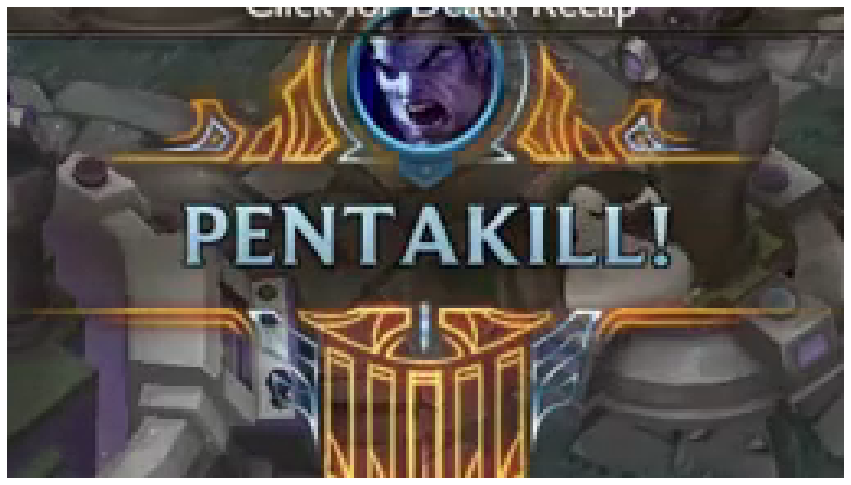

In [16]:

def get_crop_loc(video):
    if video.get(3)==1920:
        return [0.12,0.35,0.08]
    elif video.get(3)==1280:
        return [0.05,0.25,0.1]

def get_by_frame(video,index):
    video.set(1,index)
    _,frame=video.read()
    video.set(1,0)
    return frame

def get_by_sec(video,sec):
    fps=video.get(5)
    video.set(1,int(fps*sec))
    _,frame=video.read()
    video.set(1,0)
    return frame

def get_key_part(frame):
    h,w=frame.shape[:2]
    return frame[int(crop_loc[0]*h):int(crop_loc[1]*h),int(w*(1/2-crop_loc[2])):int(w*(1/2+crop_loc[2]))]
    
def display_frame(video,index):
    frame=get_by_frame(video,index)
    figure(figsize=(15,12))
    imshow(frame)
    axis("off")
    show()

def display_frame_key(video,index):
    frame=get_by_frame(video,index)
    figure(figsize=(15,12))
    imshow(get_key_part(frame))
    axis("off")
    show()
    
def resize_key_frame(frame,size=(200,180)):
    return np.array(Image.fromarray(frame).resize(size))

def process_video(video):
    fps=video.get(5)
    total=video.get(7)
    frames=[]
    for i in range(int(total/fps)):
        frames.append(get_key_part(get_by_frame(video,i*fps)))
    return np.array(frames)

def preprocess(x,y):
    return Tensor(np.transpose(x,[0,3,1,2])).to("cuda:0"),Tensor(y).long().to("cuda:0")

def predict(x):
    batch_size=32
    with torch.no_grad():
        prediction=[]
        for i in range(0,len(x),batch_size):
            tx,ty=preprocess(x[i:i+batch_size],[])
            pred=model(tx)
            prediction+=list(pred.argmax(1).cpu().numpy())
    torch.cuda.empty_cache()
    return prediction   


crop_loc=get_crop_loc(video)

display_frame_key(video,penta_list[0]+10)

In [10]:
penta_list=[38*30+20,74*30-13,106*30-56,147*30-16,172*30+6,216*30+10,235*30-1,275*30-3,309*30+15,344*30+3,403*30-1,510*30+12,546*30-9]

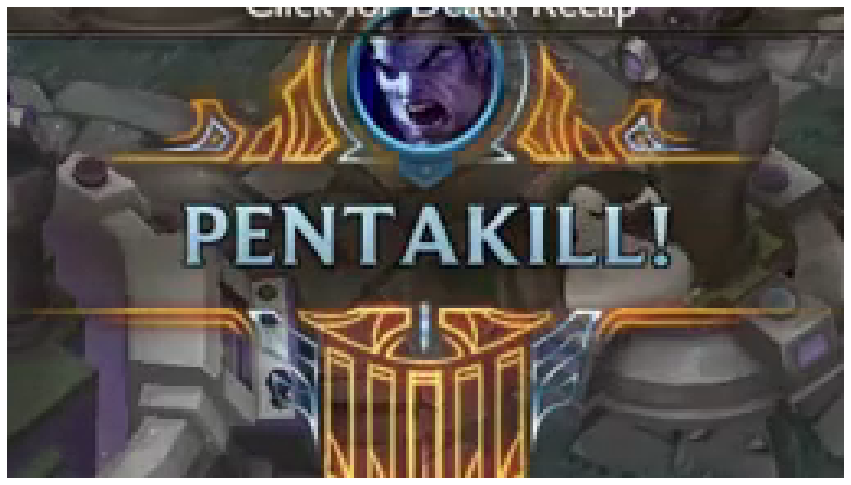

In [17]:
display_frame_key(video,penta_list[0]+10)

In [37]:
def get_data(video,penta_list):
    penta_len=80
    r=[]
    y=[]
    for i in penta_list:
        for j in range(i,i+penta_len):
            r.append(get_key_part(get_by_frame(video,j)))
            y.append(1)
    
    start=0
    normal=[]
    for i in penta_list:
        normal+=list(range(start,i))
        start=i+80+100
    
    x_normal=np.random.choice(normal,len(r)*4,replace=False)
    for i in x_normal:
        r.append(get_key_part(get_by_frame(video,i)))
        y.append(0)
    
    return array(r),array(y)

x,y=get_data(video,penta_list)
 
x.shape,y.shape
            
            

((5200, 144, 256, 3), (5200,))

In [38]:
np.save("x",x)
np.save("y",y)


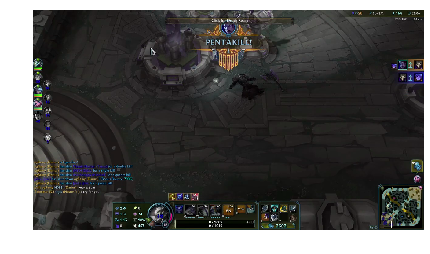

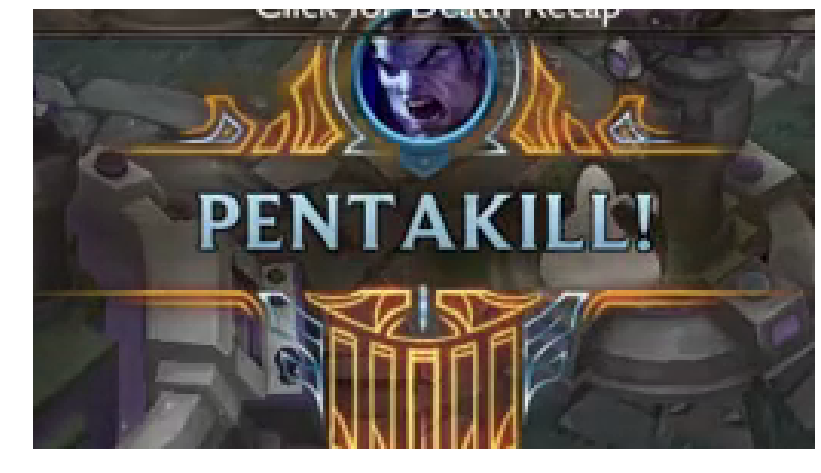

>>e


In [16]:
end=True

while end:
    end=input(">>")
    if end=="e":
        break
    else:
        clear_output()
        end=True
    
    _,frame=video.read()
    figure(figsize=(7,5))
    imshow(frame)
    axis("off")
    show()
    
    get_key_part(frame)
    
    


    

In [7]:
(3946.95+4911.76)/0.80533

11000.09933815951